/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/lib/python3.11/site-packages/threadpoolctl.py:1019: RuntimeWarning: libc not found. The ctypes module in Python 3.11 is maybe too old for this OS.
  warnings.warn(


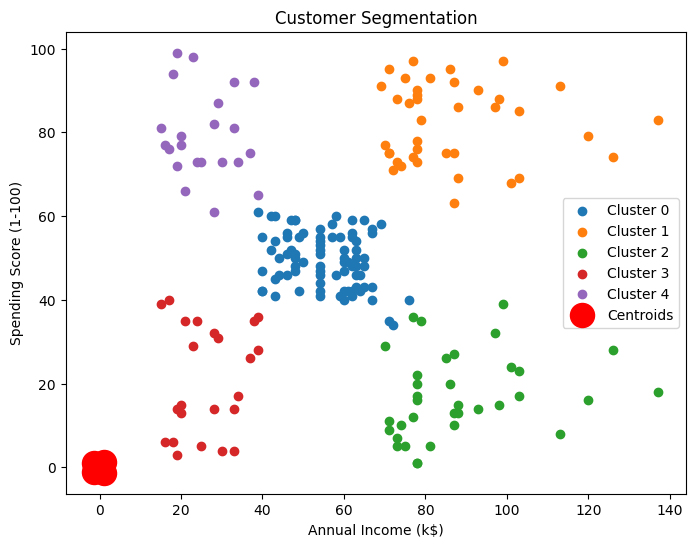

Cluster 0 Characteristics:
       Annual Income (k$)  Spending Score (1-100)
count           81.000000               81.000000
mean            55.296296               49.518519
std              8.988109                6.530909
min             39.000000               34.000000
25%             48.000000               44.000000
50%             54.000000               50.000000
75%             62.000000               55.000000
max             76.000000               61.000000
Cluster 1 Characteristics:
       Annual Income (k$)  Spending Score (1-100)
count           39.000000               39.000000
mean            86.538462               82.128205
std             16.312485                9.364489
min             69.000000               63.000000
25%             75.500000               74.500000
50%             79.000000               83.000000
75%             95.000000               90.000000
max            137.000000               97.000000
Cluster 2 Characteristics:
       Annual Incom

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Mall_Customers.csv')

# Select numeric columns for standardization
numeric_data = data.select_dtypes(include=[np.number])

# Standardization (Optional)
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)
numeric_data_scaled = pd.DataFrame(numeric_data_scaled, columns=numeric_data.columns)

# Feature Engineering (if needed)
# You can perform feature engineering by selecting relevant features. For example, let's say you want to use 'Annual Income' and 'Spending Score' for clustering.
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
features = numeric_data_scaled[selected_features]

# Clustering using K-Means
k = 5  # Number of clusters (you can choose an appropriate value)
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(features)

# Add the cluster labels to the DataFrame
data['Cluster'] = clusters

# Visualization
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    plt.scatter(cluster_data[selected_features[0]], cluster_data[selected_features[1]], label=f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel(selected_features[0])
plt.ylabel(selected_features[1])
plt.legend()
plt.show()

# Interpretation
# You can interpret the clusters by analyzing the characteristics of each cluster.

for i in range(k):
    cluster_data = data[data['Cluster'] == i]
    print(f'Cluster {i} Characteristics:')
    print(cluster_data[selected_features].describe())

# You can also save the results to a new CSV file if needed
data.to_csv('Customer_Segmentation_Results.csv', index=False)
